In [4]:
# For Data Manipulation 
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

##The primary motive of EDA is to

* Examine the data distribution
* Handling missing values of the dataset(a most common issue with every dataset)
* Handling the outliers
* Removing duplicate data
* Encoding the categorical variables
* Normalizing and Scaling



##Dataset - World Happiness Report
**columns**: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption

**Target**: Happiness Score

## Load Dataset, Check shape and scan first few observations 

In [5]:
df = pd.read_csv('sample_data/Happiness_Quotient_2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
# Dimention of the data
print(df.shape)

(157, 9)


## Check statistical information

In [7]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,157.000000,155.000000,157.000000,157.000000,157.000000,155.000000,157.000000,157.000000
mean,78.993631,5.382484,0.901331,1.204777,0.722503,0.389723,0.184955,0.110478
std,45.455176,1.132044,0.399979,0.302490,0.243777,0.146911,0.094959,0.094247
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.526500,0.578000,1.055000,0.538000,0.300500,0.109000,0.047000
50%,79.000000,5.339000,0.960000,1.269000,0.789000,0.417000,0.178000,0.086000
75%,118.000000,6.178000,1.231000,1.452000,0.881000,0.507500,0.247000,0.141000
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  157 non-null    int64  
 1   Country or region             157 non-null    object 
 2   Score                         155 non-null    float64
 3   GDP per capita                157 non-null    float64
 4   Social support                157 non-null    float64
 5   Healthy life expectancy       157 non-null    float64
 6   Freedom to make life choices  155 non-null    float64
 7   Generosity                    157 non-null    float64
 8   Perceptions of corruption     157 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


###Observation
- 2 missing values in data for "Country or region" and "Freedom to make life choices"  

### Check Null values

In [9]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           2
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    2
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Handling Missing Data
**Drop the missing values** – If the dataset is huge and missing values are very few then we can directly drop the values because it will not have much impact.

**Replace with mean values** – We can replace the missing values with mean values, but this is not advisable in case if the data has outliers.

**Replace with median values** – We can replace the missing values with median values, and it is recommended in case if the data has outliers.

**Replace with mode values** – We can do this in the case of a Categorical feature.

**Regression** – It can be used to predict the null value using other details from the dataset.


In [10]:
# Substituting with MedianScore

HappinessScore_median = df["Score"].median()
Freedom_median = df["Freedom to make life choices"].median()

print("Score Median", HappinessScore_median)
print("Freedom Median", Freedom_median)

df["Score"].replace(np.nan,HappinessScore_median,inplace=True)
df["Freedom to make life choices"].replace(np.nan,Freedom_median,inplace=True)

Score Median 5.339
Freedom Median 0.417


In [11]:
#Check null entires
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Handling Duplicates

In [12]:
duplicateValues = df.duplicated()
print(duplicateValues)
print("No of duplicated rows ", sum(duplicateValues))

0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
156     True
Length: 157, dtype: bool
No of duplicated rows  1


### Remove Duplicates

In [13]:
df.drop_duplicates(inplace=True)

# Check Duplicates
duplicateValues = df.duplicated()
print("No of duplicated rows ", sum(duplicateValues))

No of duplicated rows  0


## Handling Outliers
Handling the outliers in the data, i.e. the extreme values in the data
* **Outliers can be dropped**
* **Cap the outliers with Min and Max**
* **replace outliers using imputation as if they are missing values** 


### Identify outliers using Box plot

<function matplotlib.pyplot.show(close=None, block=None)>

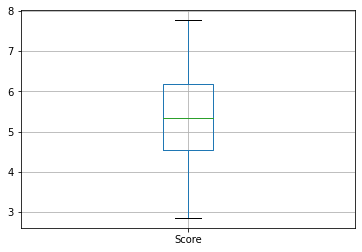

In [14]:
df.boxplot(column = ["Score"])
plt.show

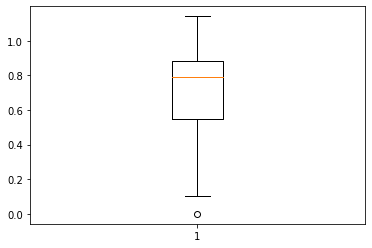

In [15]:
plt.boxplot(df["Healthy life expectancy"])
plt.show()

### Cap Outlier using min max

In [16]:
def removeoutlier(col):
	sorted(col)
	quant1, quant2 = col.quantile([0.25, 0.75])
	IQR = quant2 - quant1
	lowerrange = quant1 - (1.5 * IQR)
	upperrange = quant2 + (1.5 * IQR)
	return lowerrange, upperrange

low, high = removeoutlier(df["Healthy life expectancy"])
df["Healthy life expectancy"] = np.where(df["Healthy life expectancy"] > high, high, df["Healthy life expectancy"])
df["Healthy life expectancy"] = np.where(df["Healthy life expectancy"] < low, low, df["Healthy life expectancy"])

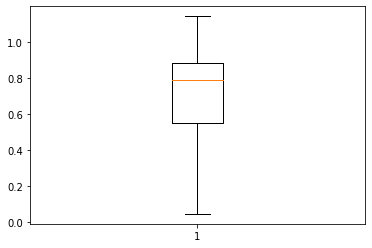

In [17]:
# Confirm removal
plt.boxplot(df["Healthy life expectancy"])
plt.show()

##**Normalizing and Scaling** – 
Data Normalization or feature scaling is a process to standardize the range of features of the data as the range may vary a lot.

Lets use **StandardScaler** for the numerical values, which uses the formula as x-mean/std deviation


In [18]:
# Normalizing Happiness Score
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()
df["Score"] = stdScale.fit_transform(df[["Score"]])

#Check Scaling
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,2.143088,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,1.990324,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,1.948743,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,1.894508,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,1.889084,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,1.560000e+02,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,-3.643809e-16,0.905147,1.208814,0.725543,0.392506,0.184846,0.110603
std,45.177428,1.003221e+00,0.398389,0.299191,0.241248,0.143231,0.095254,0.094538
min,1.000000,-2.300627e+00,0.000000,0.000000,0.046750,0.000000,0.000000,0.000000
25%,39.750000,-7.716308e-01,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,-5.345928e-02,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,7.031292e-01,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,2.143088e+00,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## Finding Corelation between attributes

**corr()** is used to find the pairwise correlation of all columns in the data frame. Any ‘nan’ values are automatically excluded.

The resulting coefficient is a value between -1 and 1 inclusive, where:

**1**: Total positive linear correlation

**0**: No linear correlation, the two variables most likely do not affect each other

**-1**: Total negative linear correlation
Pearson Correlation is the default method of the function “corr”.

<Axes: >

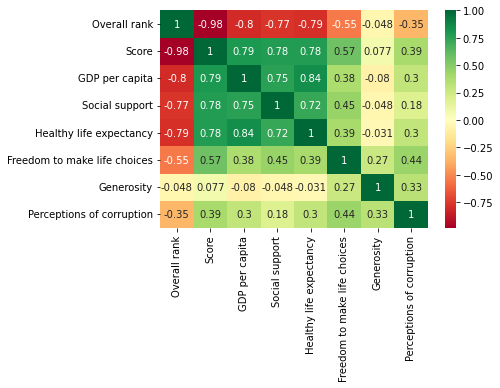

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

###Observations

With respect to Score following attributes are positively corelated
*   GDP per capita (0.79)
*   Social Support (0.78)
*   Healthy life expectancy (0.78)

<Axes: xlabel='GDP per capita', ylabel='Score'>

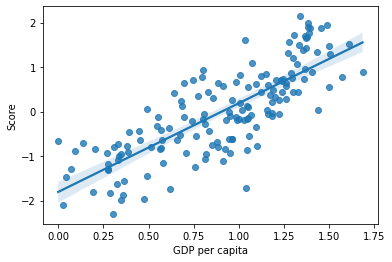

In [21]:
sns.regplot(x='GDP per capita', y='Score', data = df)


###**Observation**
**As GDP per Capita increases, Happiness Score increases **